In [4]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = "/Users/anna.schaar/phd/datasets"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [6]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '/lu/',
    data_origin='lutet2',
    radius=200,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata
['AEC', 'Erythroid cell', 'Erythroid progenitor', 'Hepatocyte', 'MK', 'Macrophage', 'Myeloid', 'SEC']
collecting image-wise celldata


 13%|█▎        | 25/195 [00:00<00:00, 247.75it/s]

adding graph-level covariates


100%|██████████| 195/195 [00:00<00:00, 289.53it/s]

Loaded 195 images with complete data from 1 patients over 54970 cells with 132 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 16.075985

 Celldata metadata: {'lateral_resolution': 0.1079, 'fn': 'FinalClusteringResults 190727 TET2.csv', 'image_col': 'FOV', 'pos_cols': ['Center_x', 'Center_y'], 'cluster_col': 'CellTypeID_new', 'cluster_col_preprocessed': 'CellTypeID_new_preprocessed'}


In [ ]:
adata = interpreter.data.spatial(
    image_key= "19",
    undefined_type='Unknown',
)

In [ ]:
import scanpy as sc
sc.pl.spatial(interpreter.data.celldata, color='CellTypeID_new_preprocessed', spot_size=5)

Trying to set attribute `.uns` of view, copying.


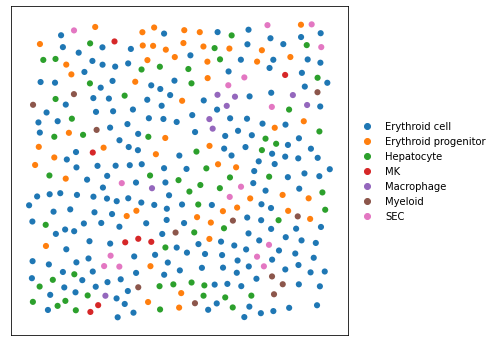

In [17]:
# Supp. Fig. 1: Cell-type centric summary statistics in MERFISH dataset.

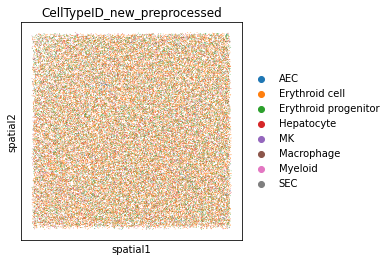

In [24]:
import scanpy as sc
sc.pl.spatial(interpreter.data.celldata, color='CellTypeID_new_preprocessed', spot_size=5)

# Supp. Fig. 1: Cell-type centric summary statistics in MERFISH dataset.

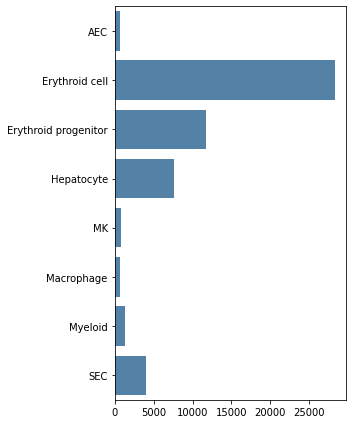

In [7]:
interpreter.data.celltype_frequencies()

0.0
1.0627242842870872
2.600040059444116
4.970298896322406
17.07598490422142
82.68769391754512
163.4445676754582
281.897195649584


/Users/anna.schaar/phd/code/ncem/ncem/data.py:192: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


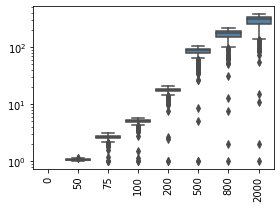

In [8]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 50, 75, 100, 200, 500, 800, 2000],
    #lateral_resolution=1.,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

  0%|          | 0/195 [00:00<?, ?it/s]/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|██████████| 195/195 [00:29<00:00,  6.65it/s]


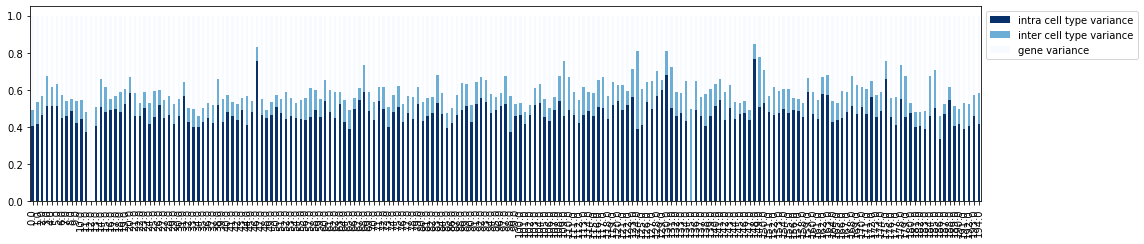

In [9]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(var_decomp)

In [10]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.472493
inter cell type variance    0.113348
gene variance               0.414160
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|██████████| 195/195 [00:10<00:00, 19.26it/s]


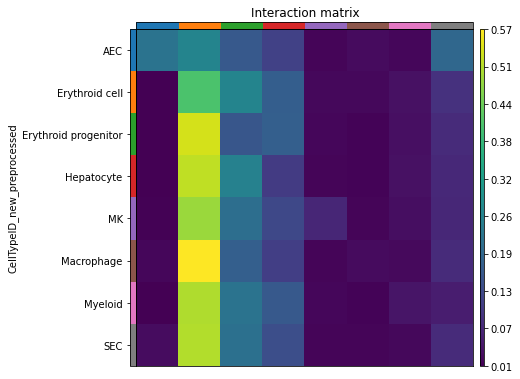

In [11]:
interpreter.data.celldata_interaction_matrix()

# Supp. Fig. 7: Ligand–receptor permutation test.

/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


n cells: 10994


/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

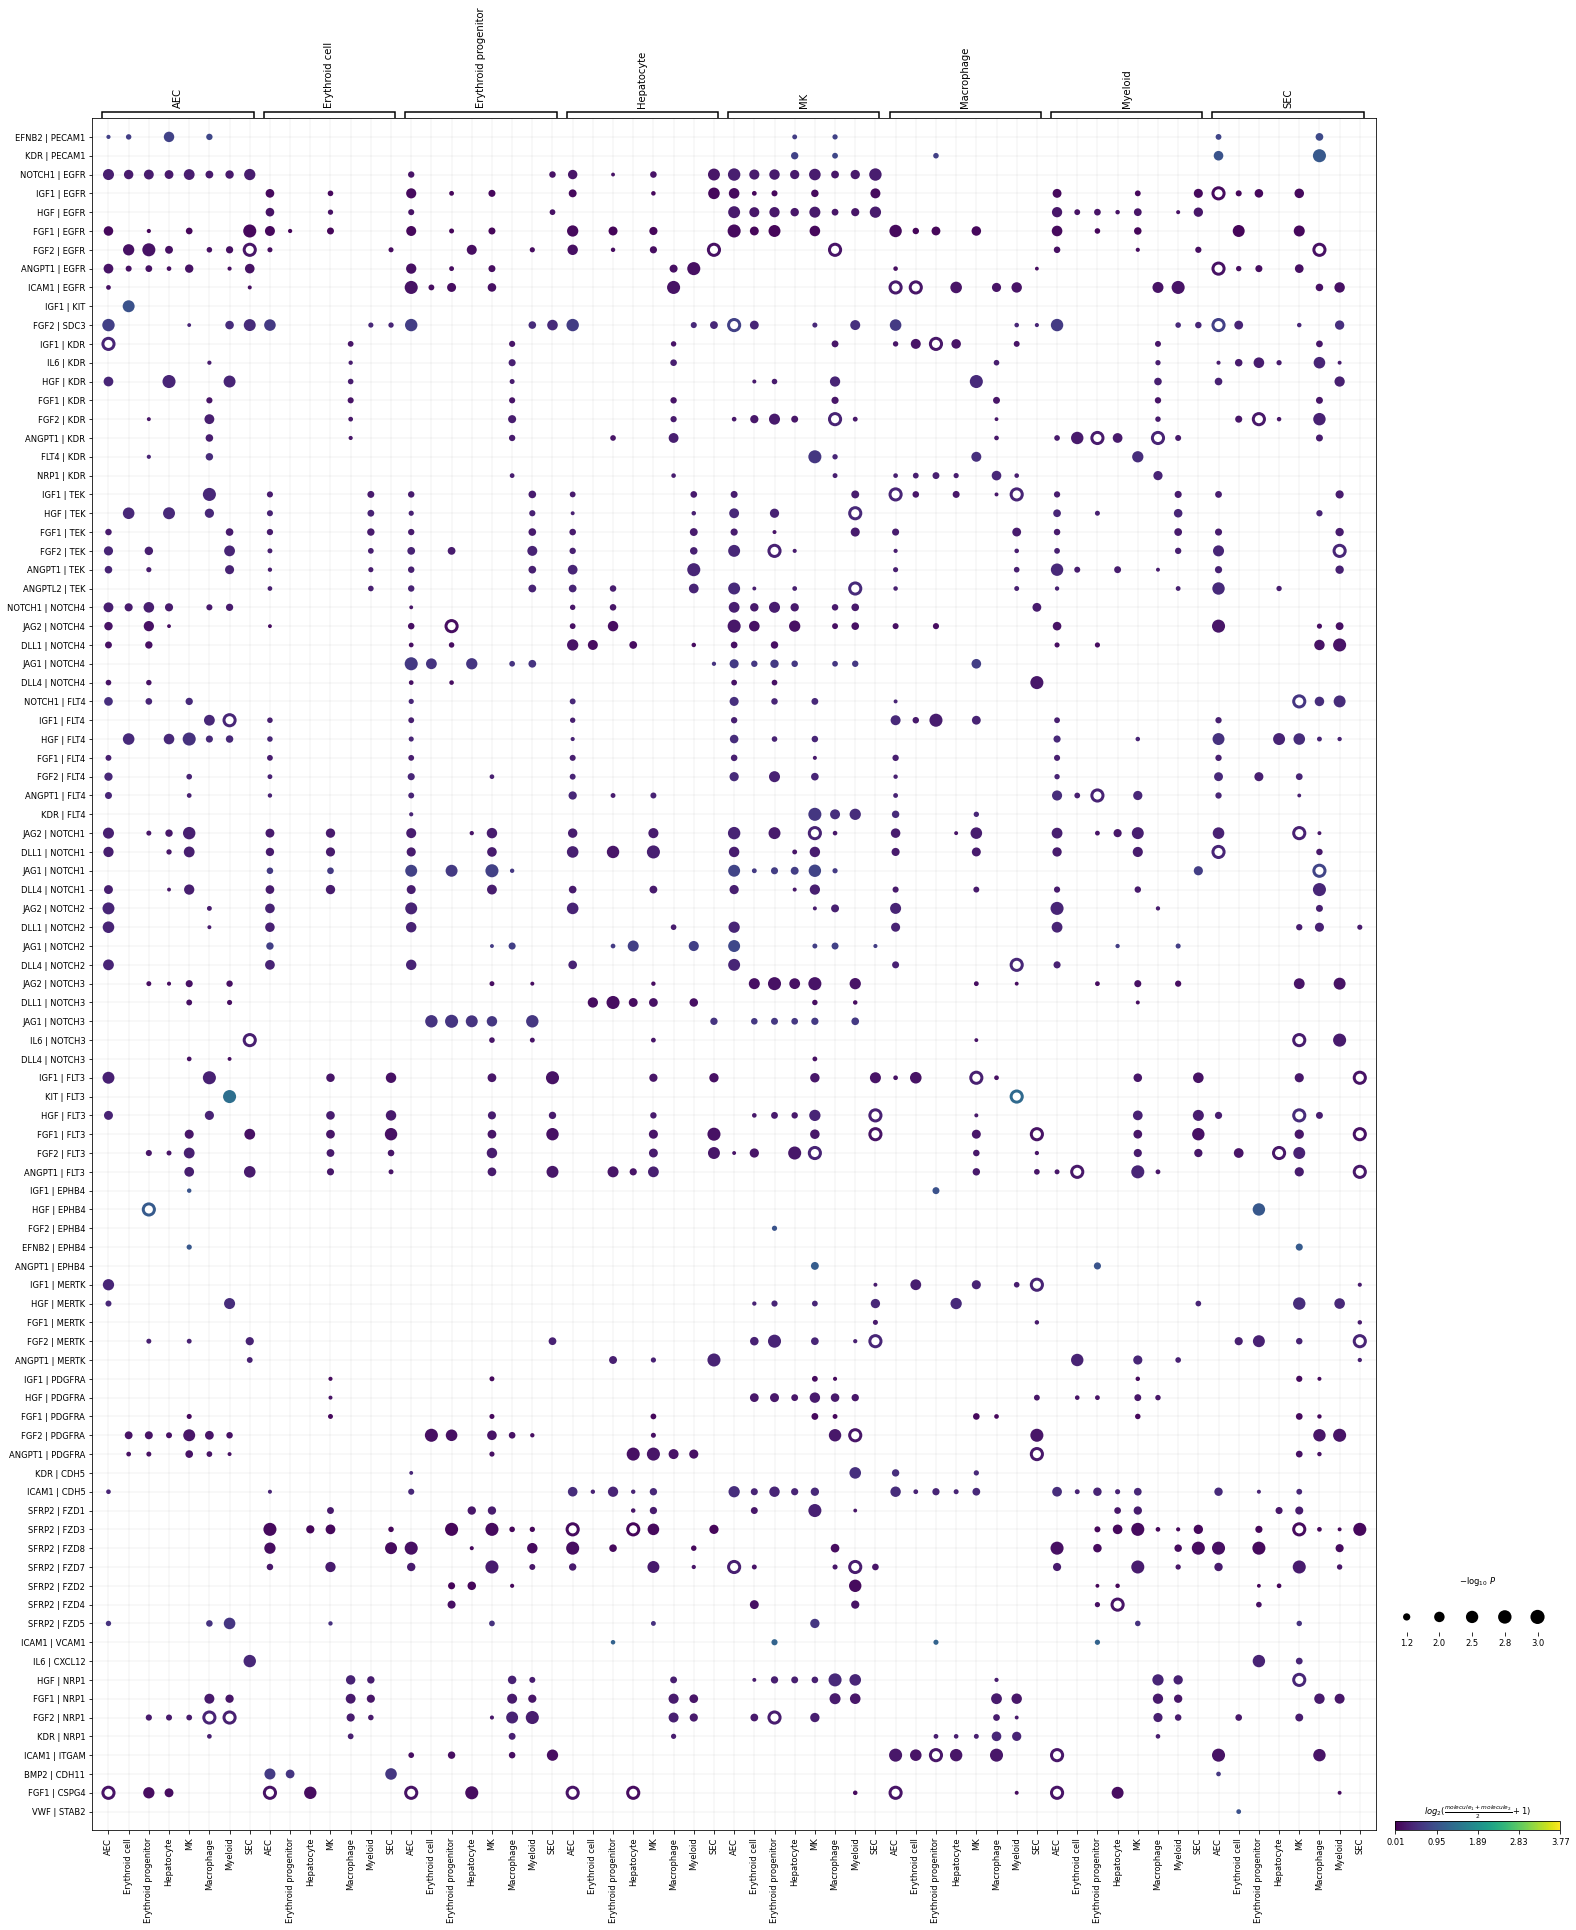

In [13]:
adata = interpreter.data.ligrec(fraction=0.2)


# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

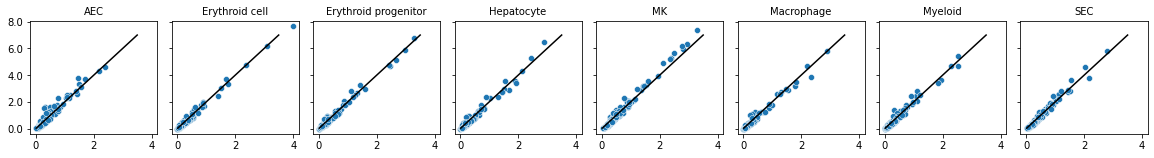

In [14]:
interpreter.data.noise_structure(max_x=3.5)